In [22]:
import micropip, piplite
from matplotlib import pyplot as plt

await micropip.install('ipympl')
%matplotlib widget

await piplite.install("reductus")
await piplite.install("helpers")
await piplite.install("requests")
import reflred
from dataflow import configure

config = {
    "cache": None,
    "data_sources": [{"name": "local", "url": "file:///", "start_path": ""}],
    "instruments": ["xrr"]
}
configure.apply_config(config)

In [9]:
from helpers import make_uploader
uploader = await make_uploader()

FileUpload(value={}, description='Upload', multiple=True)

Output()

In [11]:
from xrrred import steps
def load_one(filename):
    return steps.load([{"path": filename, "source": "local"}])[0]

f = load_one("w0p00.raw")

loading file:///w0p00.raw w0p00.raw


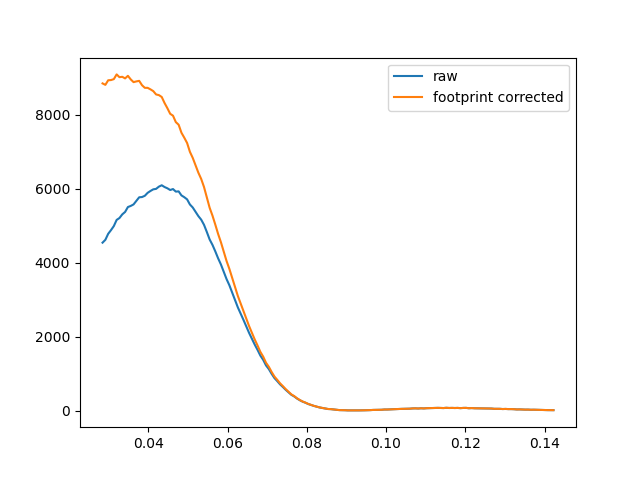

In [34]:
plt.figure()
plt.plot(f.x, f.v, label="raw")

reduced = steps.abinitio_footprint(f, width=22)
plt.plot(reduced.x, reduced.v, label="footprint corrected")
plt.legend()